<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/02_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!curl -o "train-images-idx3-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/train-images-idx3-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  8368k      0  0:00:01  0:00:01 --:--:-- 8373k


In [114]:
!curl -o "t10k-images-idx3-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/t10k-images-idx3-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  3427k      0 --:--:-- --:--:-- --:--:-- 3433k


In [115]:
!curl -o "train-labels-idx1-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/train-labels-idx1-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  97552      0 --:--:-- --:--:-- --:--:-- 97901


In [116]:
!curl -o "t10k-labels-idx1-ubyte.gz" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/t10k-labels-idx1-ubyte.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  16920      0 --:--:-- --:--:-- --:--:-- 16884


In [117]:
!curl -o "mnist.py" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/lib/mnist.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1205  100  1205    0     0   4465      0 --:--:-- --:--:-- --:--:--  4479


In [118]:
!curl -o "digit_classifier.py" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/lib/digit_classifier.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1481  100  1481    0     0   5734      0 --:--:-- --:--:-- --:--:--  5740


In [119]:
from mnist import prepend_bias, load_images, load_labels,one_hot_encode
import digit_classifier

In [120]:

X_train = prepend_bias(load_images("train-images-idx3-ubyte.gz"))
X_test = prepend_bias(load_images("t10k-images-idx3-ubyte.gz"))
Y_train = one_hot_encode(load_labels("train-labels-idx1-ubyte.gz"))
Y_test = (load_labels("t10k-labels-idx1-ubyte.gz"))

In [121]:
w = digit_classifier.train(X_train,Y_train,X_test,Y_test, iterations=200, lr=1e-5)

0 - Loss: 6.931471805599454, 
 9.8%
1 - Loss: 8.434456875083336, 
 68.04%
2 - Loss: 5.512047488923876, 
 68.1%
3 - Loss: 2.956870073593654, 
 68.62%
4 - Loss: 1.8985387657057093, 
 73.75%
5 - Loss: 1.7558289155266744, 
 81.99%
6 - Loss: 1.674881272926218, 
 81.25%
7 - Loss: 1.623875243420281, 
 82.89%
8 - Loss: 1.5652805689746652, 
 82.69%
9 - Loss: 1.5292692651055577, 
 83.61%
10 - Loss: 1.4834968500183898, 
 83.55%
11 - Loss: 1.4547390723537275, 
 84.3%
12 - Loss: 1.418784478143944, 
 84.27%
13 - Loss: 1.394256566968422, 
 84.84%
14 - Loss: 1.3659350910622259, 
 84.96%
15 - Loss: 1.3445875188347647, 
 85.34%
16 - Loss: 1.3220198232096096, 
 85.4%
17 - Loss: 1.3034634184193592, 
 85.81%
18 - Loss: 1.285117113766232, 
 85.86%
19 - Loss: 1.269068315150054, 
 86.18%
20 - Loss: 1.2537827753717958, 
 86.22%
21 - Loss: 1.2398963816638573, 
 86.55%
22 - Loss: 1.2268469039957433, 
 86.51%
23 - Loss: 1.214740575732478, 
 86.74%
24 - Loss: 1.2033678230704052, 
 86.75%
25 - Loss: 1.1926945710963

In [122]:
digit_classifier.test(X_test, Y_test, w)

Success: 9032/10000 90.32%


In [182]:
! export CUSTOM_FILE_IMG="8_typed_med.png"
! curl -o "8_typed_med.png" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/8_typed_med.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15763  100 15763    0     0  59809      0 --:--:-- --:--:-- --:--:-- 59935


In [167]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_image(file):
  test_image = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
  img_resized = cv2.resize(test_image, (28, 28))
  img_resized = cv2.bitwise_not(img_resized)
  plt.imshow(img_resized, cmap="Greys")
  return img_resized

In [193]:
# prompt: cv2 image to np buffer

def cv2_to_np_buffer(img):
  np_img = np.asarray(img)
  np_img = np.expand_dims(np_img, axis=0)
  print(np_img.shape)
  return np_img

def prepare_image(img):
  img = cv2_to_np_buffer(load_image(img))
  img= img.reshape(1,28*28)
  img = prepend_bias(img)
  print(f"w shape: {w.shape}")
  print(f"img shape: {img.shape}")
  return img


(1, 28, 28)
w shape: (785, 10)
img shape: (1, 785)


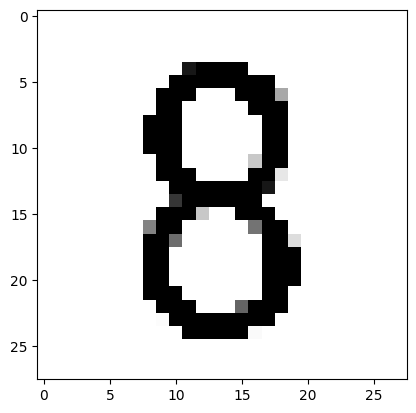

In [194]:
number_8 = prepare_image("8_typed_med.png")

In [195]:
digit_classifier.classify(number_8,w)

array([[8]])

In [139]:
import pandas as pd
pd.DataFrame(w)

,0,1,2,3,4,5,6,7,8,9
0,-0.000014,-2.362471e-06,-1.702364e-05,-2.010009e-05,-9.915624e-06,-5.944340e-06,-1.295700e-05,-0.000006,-4.355776e-05,-2.180818e-05
1,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
3,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
4,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
780,-0.000003,-4.612743e-08,-1.371935e-07,-1.187978e-07,-8.519923e-07,-1.664934e-07,-1.588954e-07,0.000002,-2.824660e-07,-4.181571e-07
781,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
782,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
783,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
